# Project on Credit Card Fraud Detection

In this project we have taken a dataset with history of credit card transactions. **Features include** - parameters relating to each stage of authentication in online transactions indicated by **V1...V28**, **time of transaction and amount of transaction.** We have tried to show dependencies between features with the help of certain visualizations. The label **'Class' is a 0 or 1 value** which indicates whether fraud was committed or not. We have tried to classify future transactions with the help of different classification algorithms and compafred their accuracies to recommend the best algorithm.

In [1]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing csv file and converting it to a dataframe

df = pd.read_csv('creditcard.csv')
pd.set_option('display.max_columns', None)  #this is used to display all columns of the df

In [3]:
#checking the head of the data frame
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#to check datatypes of all columns/ features

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Therefore all the data is in numerical form and there are no null values in the dataset

In [6]:
#to check mean and std deviation of the data 
round(df.describe(),5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000
mean,94813.85958,0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,88.34962,0.00173
std,47488.14595,1.95870,1.65131,1.51626,1.41587,1.38025,1.33227,1.23709,1.19435,1.09863,1.08885,1.02071,0.99920,0.99527,0.95860,0.91532,0.87625,0.84934,0.83818,0.81404,0.77093,0.73452,0.72570,0.62446,0.60565,0.52128,0.48223,0.40363,0.33008,250.12011,0.04153
min,0.00000,-56.40751,-72.71573,-48.32559,-5.68317,-113.74331,-26.16051,-43.55724,-73.21672,-13.43407,-24.58826,-4.79747,-18.68371,-5.79188,-19.21433,-4.49894,-14.12985,-25.16280,-9.49875,-7.21353,-54.49772,-34.83038,-10.93314,-44.80774,-2.83663,-10.29540,-2.60455,-22.56568,-15.43008,0.00000,0.00000
25%,54201.50000,-0.92037,-0.59855,-0.89036,-0.84864,-0.69160,-0.76830,-0.55408,-0.20863,-0.64310,-0.53543,-0.76249,-0.40557,-0.64854,-0.42557,-0.58288,-0.46804,-0.48375,-0.49885,-0.45630,-0.21172,-0.22839,-0.54235,-0.16185,-0.35459,-0.31715,-0.32698,-0.07084,-0.05296,5.60000,0.00000
50%,84692.00000,0.01811,0.06549,0.17985,-0.01985,-0.05434,-0.27419,0.04010,0.02236,-0.05143,-0.09292,-0.03276,0.14003,-0.01357,0.05060,0.04807,0.06641,-0.06568,-0.00364,0.00373,-0.06248,-0.02945,0.00678,-0.01119,0.04098,0.01659,-0.05214,0.00134,0.01124,22.00000,0.00000
75%,139320.50000,1.31564,0.80372,1.02720,0.74334,0.61193,0.39856,0.57044,0.32735,0.59714,0.45392,0.73959,0.61824,0.66250,0.49315,0.64882,0.52330,0.39967,0.50081,0.45895,0.13304,0.18638,0.52855,0.14764,0.43953,0.35072,0.24095,0.09105,0.07828,77.16500,0.00000
max,172792.00000,2.45493,22.05773,9.38256,16.87534,34.80167,73.30163,120.58949,20.00721,15.59499,23.74514,12.01891,7.84839,7.12688,10.52677,8.87774,17.31511,9.25353,5.04107,5.59197,39.42090,27.20284,10.50309,22.52841,4.58455,7.51959,3.51735,31.61220,33.84781,25691.16000,1.00000


### Features v9 to v14 have mean =0 and stddev is approx 1, therefore they have a normal distribution

In [7]:
#to get a view of our label

df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
#now lets try to get a correlation bw class and other features

round(df.corr(), 6)


#look for values which are close to -1 or 1 for some correlation

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117396,-0.010593,-0.419618,-0.105260,0.173072,-0.063016,0.084714,-0.036949,-0.008660,0.030617,-0.247689,0.124348,-0.065902,-0.098757,-0.183453,0.011903,-0.073297,0.090438,0.028975,-0.050866,0.044736,0.144059,0.051142,-0.016182,-0.233083,-0.041407,-0.005135,-0.009413,-0.010596,-0.012323
V1,0.117396,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.227709,-0.101347
V2,-0.010593,0.000000,1.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.531409,0.091289
V3,-0.419618,-0.000000,0.000000,1.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.210880,-0.192961
V4,-0.105260,0.000000,-0.000000,-0.000000,1.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.098732,0.133447
V5,0.173072,0.000000,-0.000000,-0.000000,-0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.386356,-0.094974
V6,-0.063016,0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.215981,-0.043643
V7,0.084714,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.397311,-0.187257
V8,-0.036949,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,1.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.103079,0.019875
V9,-0.008660,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.044246,-0.097733


## DATA VISUALIZATION AND EXPLORATION
from the cell above we can see which features are more dependent on the label than the others so let us have a look at it

In [9]:
sns.set_style('darkgrid')
sns.set_palette('coolwarm')

<AxesSubplot:>

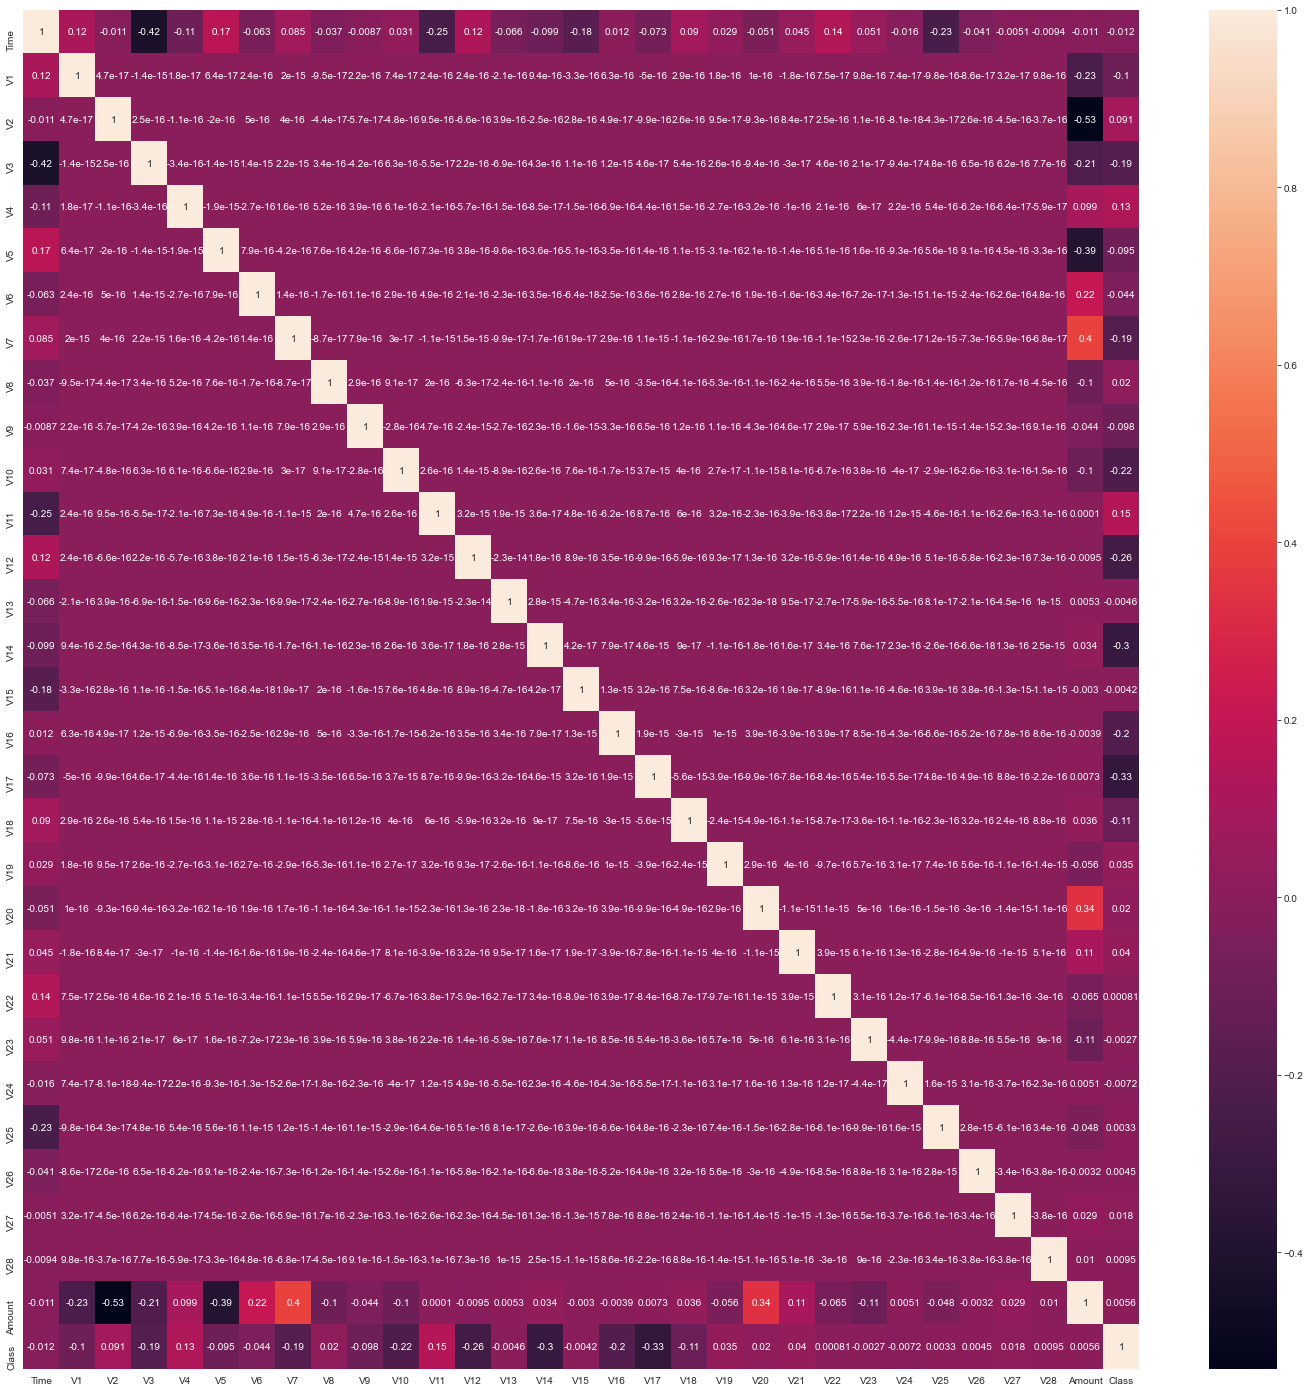

In [10]:
plt.figure(figsize = (25,25))
sns.heatmap(df.corr(), annot = True)


In [ ]:
#observe the distribution of various features which show a dependency on class :{v17,v12,,v14,v10}
plt.figure(figsize=(12,6))
df['V17'].plot.kde()
df['V12'].plot.kde()
df['V14'].plot.kde()
df['V10'].plot.kde()
plt.xlim(-20,20)

In [ ]:
sns.barplot( x = 'Class', y = 'Amount', data = df)

#so we conclude that there are more frauds committed if the amount is more

In [ ]:
sns.barplot(x = 'Class', y = 'Time', data = df)

#we conclude that a fraud is more likely to be committed if the time is less

In [ ]:
#the following show a dependency on amount
sns.lmplot(x = 'V2', y = 'Amount', hue = 'Class', data = df)

In [ ]:
sns.lmplot(x = 'V5', y = 'Amount', hue = 'Class', data = df)

In [ ]:
sns.lmplot(x = 'V7', y = 'Amount', hue = 'Class', data = df)

In [ ]:
#the following show a dependency on Time
sns.lmplot(x = 'V25', y = 'Time', hue = 'Class', data = df)

In [ ]:
sns.lmplot(x = 'V11', y = 'Time', hue = 'Class', data = df)

In [ ]:
sns.lmplot(x = 'V15', y = 'Time', hue = 'Class', data = df)

## Creating model. 
It is a classification problem therefore we can use algorithms like logistic regression, random forest classfication and decision tree.

In [ ]:
#import train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
#creating features and labels matrix
X = df.drop('Class', axis = 1)
y = df['Class']

In [ ]:
X

### the column 'Amount' is not in the same range as other features, therefore we will scale our features

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled = pd.DataFrame(X_scaled)


In [ ]:
X_scaled

In [ ]:
#creating training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=101)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)

In [ ]:
pred = lr.predict(X_test)

In [ ]:
#to check the accuracy of our model we will use some metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
print("classification report:") 
print(classification_report(y_test,pred))
print("confusion matix:")
print(confusion_matrix(y_test,pred))
print("accuracy score:")
print(accuracy_score(y_test,pred)*100)

### lets check whether this score can be improved by increasing the training set

In [ ]:

X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [ ]:
lr.fit(X_new_train, y_new_train)

In [ ]:
preds_2 = lr.predict(X_new_test)

In [ ]:
print("classification report:") 
print(classification_report(y_new_test,preds_2))
print("confusion matix:")
print(confusion_matrix(y_new_test,preds_2))
print("accuracy score:")
print(accuracy_score(y_new_test,preds_2)*100)

### we see an abnormality here where the accuracy score has decreased when we have increased the training data

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train, y_train)

In [ ]:
pred_dt = dt.predict(X_test)

In [ ]:
print("classification report:") 
print(classification_report(y_test,pred_dt))
print("confusion matix:")
print(confusion_matrix(y_test,pred_dt))
print("accuracy score:")
print(accuracy_score(y_test,pred_dt)*100)

### lets check whether this score can be improved by increasing the training set

In [ ]:
dt.fit(X_new_train, y_new_train)

In [ ]:
dt_preds = dt.predict(X_new_test)

In [ ]:
print("classification report:") 
print(classification_report(y_new_test,dt_preds))
print("confusion matix:")
print(confusion_matrix(y_new_test,dt_preds))
print("accuracy score:")
print(accuracy_score(y_new_test,dt_preds)*100)

### again accuracy has decreased but not significantly

## Random Forest Classifier

In [ ]:
#import the model for our classification problem
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#creating an instance of this model
rf = RandomForestClassifier(n_estimators=200)

In [ ]:
#fit the training set to the model
rf.fit(X_train, y_train)

In [ ]:
#making predictions based on this model
predss = rf.predict(X_test)

In [ ]:
print("classification report:") 
print(classification_report(y_test,predss))
print("confusion matix:")
print(confusion_matrix(y_test,predss))
print("accuracy score:")
print(accuracy_score(y_test,predss)*100)

### lets check whether this score can be improved by increasing the training set

In [ ]:
rf.fit(X_new_train,y_new_train)

In [ ]:
pred = rf.predict(X_new_test)

In [ ]:
print("classification report:") 
print(classification_report(y_new_test,pred))
print("confusion matix:")
print(confusion_matrix(y_new_test,pred))
print("accuracy score:")
print(accuracy_score(y_new_test,pred)*100)

### this didnt do much to improve the model, so even by increasing the training set we didnt see a huge improvement in our model
### however this is still a great model

### Therefore, we have made predictions using different algorithms and concluded that the Random Forest Classifier gives us the best results with 99.95962220427653% accuracy 